## The goal of this code is to convert images of lily slices into masks of the petal cross-sections.

In [24]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

In [25]:
#access test image on google drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


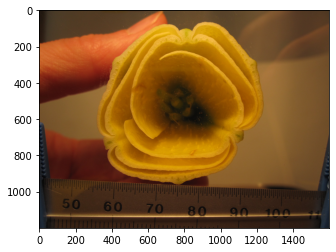

In [26]:
lily = plt.imread('/content/drive/MyDrive/testlilyslice.jpeg')
plt.imshow(lily)

(-0.5, 1599.5, 1199.5, -0.5)

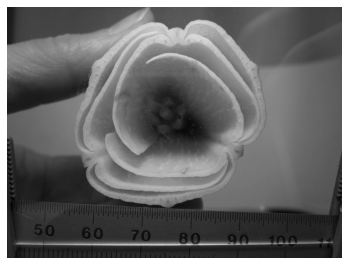

In [27]:
#convert the lily image to black and white
lily_gr = rgb2gray(lily)

fig, ax = plt.subplots(figsize = (6,6))
ax.imshow(lily_gr, cmap = 'gray')
ax.axis('off')

In [28]:
#Need better way to get the dimensions of the image

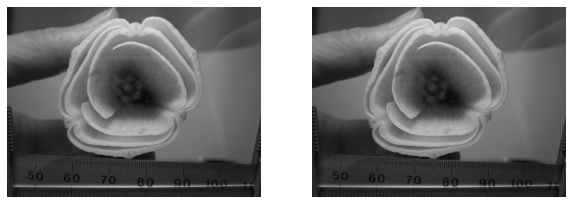

In [29]:
#enhance image using a high-pass freqency domain filter

#make high-pass filter
xi = np.linspace(0,1599,1600)
yi = np.linspace(0,1199,1200)
x,y = np.meshgrid(xi,yi)
mu, sigma = 256, 5    #change sigma to increase/decrease filter

hp_filt =1 - np.exp(-((x-mu)**2 + (y-mu)**2)/(2*sigma**2)) 

#create the high-pass filtered image
f_lily = sp.fft.fft2(lily_gr) #perform FFT
f_lily2 = sp.fft.fftshift(f_lily) #center
f_lily3 = np.multiply(f_lily2, hp_filt) #Multiply by filter function
f_lily4 = sp.fft.ifftshift(f_lily3) #uncenter
lily_enhanced = np.real(sp.fft.ifft2(f_lily4)) #perform iFFT

#compare to the origional gray scale
fig, ax = plt.subplots(ncols=2, figsize=(10,6))
ax[0].imshow(lily_gr, cmap='gray')
ax[1].imshow(lily_enhanced, cmap='gray')

for axi in ax:
  axi.axis('off')

In [30]:
#slightly clearer but not significantly so.